In [3]:
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[0].shape

(28, 28)

In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

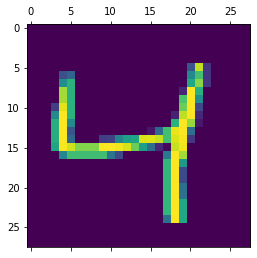

In [10]:
plt.matshow(X_train[2])

In [11]:
y_train[2]

4

In [12]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_train= X_train/255
X_test= X_test/255

In [15]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [16]:
X_train_flattened.shape

(60000, 784)

In [17]:
X_test_flattened.shape

(10000, 784)

In [18]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [19]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation ='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7299 - accuracy: 0.8060
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3088 - accuracy: 0.9142
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2870 - accuracy: 0.9202
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2727 - accuracy: 0.9242
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2663 - accuracy: 0.9261


In [20]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 848us/step - loss: 0.2645 - accuracy: 0.9257


[0.26453930139541626, 0.9257000088691711]

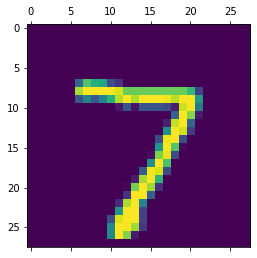

In [21]:
plt.matshow(X_test[0])

In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([1.9835919e-02, 3.1804046e-07, 6.0938030e-02, 9.5571518e-01,
       2.3326278e-03, 7.8681976e-02, 9.9189606e-07, 9.9969482e-01,
       7.6202095e-02, 6.3632500e-01], dtype=float32)

In [23]:
np.argmax(y_predicted[0])

7

In [28]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [25]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [33]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    0,    2,    0,    6,    8,    2,    2,    1],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   5,    9,  922,   18,    8,    5,   13,   10,   38,    4],
       [   2,    0,   18,  928,    1,   21,    2,    9,   20,    9],
       [   1,    1,    3,    2,  920,    0,   11,    3,    9,   32],
       [   7,    3,    2,   37,    9,  778,   15,    5,   29,    7],
       [   8,    3,    5,    1,    8,   13,  915,    2,    3,    0],
       [   1,    7,   23,    8,    8,    1,    0,  942,    3,   35],
       [   5,    9,    7,   23,    9,   33,    9,   11,  860,    8],
       [  10,    7,    1,   11,   28,    5,    0,   23,    7,  917]])>

Text(69.0, 0.5, 'Truth')

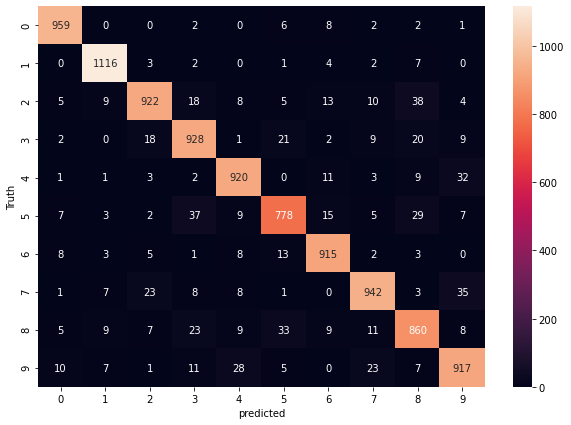

In [35]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')


In [37]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation ='relu'),
    keras.layers.Dense(10,activation ='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4574 - accuracy: 0.8709
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1425 - accuracy: 0.9604
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0896 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0675 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0537 - accuracy: 0.9840


In [38]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0908 - accuracy: 0.9728


[0.0907539576292038, 0.9728000164031982]

Text(69.0, 0.5, 'Truth')

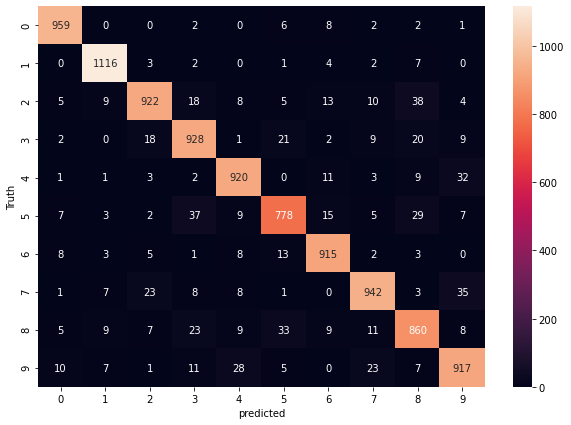

In [39]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')